# Fitting a Logistic Regression Model - Lab

## Introduction
In the last lecture, you were given a broad overview of logistic regression. This included two seperate packages for creating logistic regression models. We'll first investigate building logistic regression models with 

## Objectives

You will be able to:
* Understand and implement logistic regression


## Review

The stats model example we covered had four essential parts:
    * Importing the data
    * Defining X and y
    * Fitting the model
    * Analyzing model results

The corresponding code to these four steps was:

```
import pandas as pd
from patsy import dmatrices
import statsmodels.api as sm

#Step 1: Importing the data
salaries = pd.read_csv("salaries_final.csv", index_col = 0)

#Step 2: Defining X and y
y, X = dmatrices('Target ~ Age  + C(Race) + C(Sex)',
                  salaries, return_type = "dataframe")

#Step 3: Fitting the model
logit_model = sm.Logit(y.iloc[:,1], X)
result = logit_model.fit()

#Step 4: Analyzing model results
result.summary()
```

Most of this should be fairly familiar to you; importing data with Pandas, initializing a regression object, and calling the fit method of that object. However, step 2 warrants a slightly more in depth explanation.

The `dmatrices()` method above mirrors the R languages syntax. The first parameter is a string representing the conceptual formula for our model. Afterwards, we pass the dataframe where the data is stored, as well as an optional parameter for the formate in which we would like the data returned. The general pattern for defining the formula string is: `y_feature_name ~ x_feature1_name + x_feature2_name + ... + x_featuren_name`. You should also notice that two of the x features, Race and Sex, are wrapped in `C()`. This indicates that these variables are *categorical* and that dummy variables need to be created in order to convert them to numerical quantities. Finally, note that y itself returns a Pandas DataFrame with two columns as y itself was originally a categorical variable. With that, it's time to try and define a logistic regression model on your own! 

## Your Turn - Step 1: Import the Data

Import the data stored in the file **titanic**.

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from patsy import dmatrices
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

In [12]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<function matplotlib.pyplot.show(*args, **kw)>

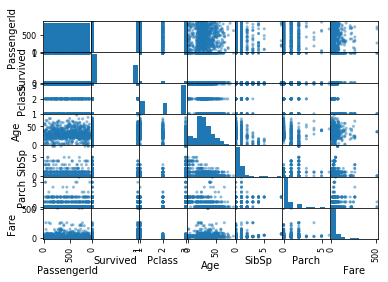

In [13]:
pd.plotting.scatter_matrix(df)
plt.show

## Step 2: Define X and Y

For our first foray into logistic regression, we are going to attempt to build a model that classifies whether an indivdual survived the Titanic shiwrech or not (yes its a bit morbid). Follow the programming patterns described above to define X and y.

In [27]:
df.Age = df.Age.fillna(df.Age.median())

In [28]:
y, X = dmatrices('Survived ~ C(Pclass) + C(Sex) + Age + SibSp + Parch', df, return_type = "dataframe")

In [29]:
X.head()

,Intercept,C(Pclass)[T.2],C(Pclass)[T.3],C(Sex)[T.1],Age,SibSp,Parch
0,1.0,0.0,1.0,1.0,22.0,1.0,0.0
1,1.0,0.0,0.0,0.0,38.0,1.0,0.0
2,1.0,0.0,1.0,0.0,26.0,0.0,0.0
3,1.0,0.0,0.0,0.0,35.0,1.0,0.0
4,1.0,0.0,1.0,1.0,35.0,0.0,0.0


In [31]:
y.head()

,Survived
0,0.0
1,1.0
2,1.0
3,1.0
4,0.0


## Step 3: Fit the model

Now with everything in place, initialize a regression object and fit your model!

### Warning: If you receive an error of the form "LinAlgError: Singular matrix"
Stats models was unable to fit the model due to some Linear Algebra problems. Specifically, the matrix was not invertable due to not being full rank. In layman's terms, there was a lot of redundant superfulous data. Try removing some features from the model and running it again.

In [35]:
# scikit-learn version
# model = LogisticRegression(fit_intercept = False)
# mdl = model.fit(X, y)
# model.coef_
scikit_model = LogisticRegression()
scikit_result = scikit_model.fit(X, y['Survived'])
scikit_model.coef_


/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([[ 1.74813143, -0.93418612, -2.05869845, -2.57518414, -0.03319836,
        -0.29617329, -0.05086052]])

In [36]:
#statsmodels version
logit_model = sm.Logit(y['Survived'], X)
statsmodels_result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.443760
         Iterations 6


In [37]:
statsmodels_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      884
Method:                           MLE   Df Model:                            6
Date:                Wed, 15 May 2019   Pseudo R-squ.:                  0.3336
Time:                        15:59:03   Log-Likelihood:                -395.39
converged:                       True   LL-Null:                       -593.33
                                        LLR p-value:                 2.154e-82
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          4.0480      0.403     10.044      0.000       3.258       4.838
C(Pclass)[T.2]    -1.1814      0.261     -4.520      0.000      -1.694      -0.669
C(Pclass)[T.3]    -2.3527      0.243     -9.670      0.000      -2.830      -1.876
C(Sex)[T.1]       -2.7661      0.199    -13.930      0.000      -3.155      -2.377
Age               -0.0398      0.008     -5.096      0.000      -0.055      -0.025
SibSp             -0.3326      0.108     -3.075      0.002      -0.545      -0.121
Parch             -0.0763      0.115     -0.667      0.505      -0.301       0.148
==================================================================================
"""

## Step 4: Analyzing results

Generate the summary table for your model. Then, comment on the p-values associated with the various features you chose.

All of the parameters are within the p <= 0.05 cutoff except 'Parch,' which is a little surprising because it's the number of parents / children aboard the Titanic.

## Your analysis here

## Level - up

Create a new model, this time only using those features you determined were influential based on your analysis in step 4.

In [ ]:
#your code here

## Summary 

Well done. In this lab we practiced using stats models to build a logistic regression model. We then reviewed interpreting the results, building upon our previous stats knowledge, similar to linear regression. Continue on to take a look at building logistic regression models in Sci-kit learn!